In [70]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

In [71]:
df = pd.read_csv("breast-cancer.csv.xls")

In [72]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [73]:
df.isna().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [74]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
281    False
282    False
283    False
284    False
285    False
Length: 286, dtype: bool

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [76]:
x = df[['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad']] #Feature
y = df["irradiat"] #Target

# ENCODING DATA

In [77]:
x = pd.get_dummies(x)

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
O = LabelEncoder()

In [80]:
y = O.fit_transform(y)

# SPLIT DATA

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [82]:
print(f'panjang x train : {len(x_train)}\n',
f'panjang y train : {len(y_train)}\n',
f'panjang x test : {len(x_test)}\n',
f'panjang y test : {len(y_test)}\n')

panjang x train : 200
 panjang y train : 200
 panjang x test : 86
 panjang y test : 86



In [83]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   deg-malig              286 non-null    int64
 1   age_20-29              286 non-null    uint8
 2   age_30-39              286 non-null    uint8
 3   age_40-49              286 non-null    uint8
 4   age_50-59              286 non-null    uint8
 5   age_60-69              286 non-null    uint8
 6   age_70-79              286 non-null    uint8
 7   menopause_ge40         286 non-null    uint8
 8   menopause_lt40         286 non-null    uint8
 9   menopause_premeno      286 non-null    uint8
 10  tumor-size_0-4         286 non-null    uint8
 11  tumor-size_10-14       286 non-null    uint8
 12  tumor-size_15-19       286 non-null    uint8
 13  tumor-size_20-24       286 non-null    uint8
 14  tumor-size_25-29       286 non-null    uint8
 15  tumor-size_30-34       286 non-null    u

# Data standarisasi

In [84]:
ss = StandardScaler()

In [85]:
x_scaled_train = ss.fit_transform(x_train)
x_scaled_test = ss.fit_transform(x_test)

In [86]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

# MEMBUAT MODEL

In [87]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()

#Input Layer
model.add(Dense(50, activation='relu', input_dim=39))

#Output Layer
model.add(Dense(2, activation='sigmoid')) #output layer harus disamakan dengan jumlah class, semakin banyak jumlah neuron semakin kompleks modelnya jadi bisa overfitting

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                2000      
                                                                 
 dense_5 (Dense)             (None, 2)                 102       
                                                                 
Total params: 2,102
Trainable params: 2,102
Non-trainable params: 0
_________________________________________________________________


# Import Library

In [88]:
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

# Mengoptimasi Model

In [89]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='accuracy', #dilihat berdasarkan validasi accuracy atau accuracy saja, tetapi monitor hanya bisa memasukkan 1 saja
                                patience=20)#jadi jika di 20 epoch selanjutnya itu tidak berubah maka diberentikan


In [90]:
model.compile(
    optimizer=Adam(),
    loss = binary_crossentropy,
    metrics = ['accuracy']
)

# Melatih model training

In [91]:
history = model.fit(
    x = x_scaled_train, 
    y = y_train,
    validation_data=(x_scaled_test,y_test),
    epochs=120,
    verbose=1,
    callbacks=[monitor_val_acc]
)

Epoch 1/120
7/7 [==============================] - 1s 26ms/step - loss: 0.8925 - accuracy: 0.3100 - val_loss: 0.8618 - val_accuracy: 0.3256
Epoch 2/120
7/7 [==============================] - 0s 7ms/step - loss: 0.8139 - accuracy: 0.3900 - val_loss: 0.7974 - val_accuracy: 0.3721
Epoch 3/120
7/7 [==============================] - 0s 6ms/step - loss: 0.7474 - accuracy: 0.5200 - val_loss: 0.7449 - val_accuracy: 0.5000
Epoch 4/120
7/7 [==============================] - 0s 10ms/step - loss: 0.6942 - accuracy: 0.6300 - val_loss: 0.6980 - val_accuracy: 0.5930
Epoch 5/120
7/7 [==============================] - 0s 10ms/step - loss: 0.6480 - accuracy: 0.7400 - val_loss: 0.6587 - val_accuracy: 0.6744
Epoch 6/120
7/7 [==============================] - 0s 8ms/step - loss: 0.6093 - accuracy: 0.7750 - val_loss: 0.6266 - val_accuracy: 0.6977
Epoch 7/120
7/7 [==============================] - 0s 6ms/step - loss: 0.5764 - accuracy: 0.8050 - val_loss: 0.5997 - val_accuracy: 0.7558
Epoch 8/120
7/7 [=======

In [92]:
model.evaluate(x_scaled_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.7398 - accuracy: 0.7674


[0.7397895455360413, 0.7674418687820435]

# Visualisasi

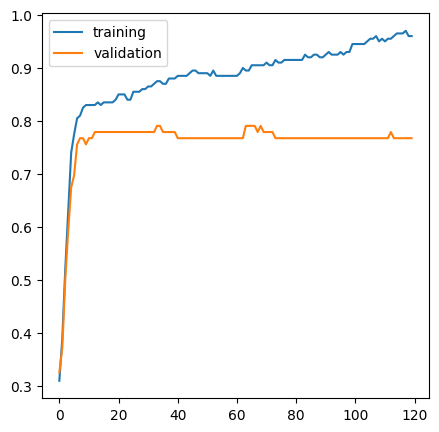

In [93]:
plt.figure(1, figsize=(5,5))
plt.plot(range(len(history.history['accuracy'])), 
         history.history['accuracy'],
         label='training')
plt.plot(range(len(history.history['val_accuracy'])), 
         history.history['val_accuracy'],
         label='validation')
plt.legend()
plt.show()

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [95]:
y_pred = model.predict(x_scaled_test)

3/3 [==============================] - 0s 2ms/step


Hasil Probabilitas
- jika lebih besar kiri maka mengembalikan 0 
- jika lbeih besar kanan mengembalikan 1

In [96]:
y_pred

array([[9.97144401e-01, 1.52997870e-03],
       [6.88585401e-01, 2.77935028e-01],
       [9.49832857e-01, 6.35603145e-02],
       [9.90135491e-01, 5.59446961e-03],
       [3.48806322e-01, 6.62361681e-01],
       [7.28955030e-01, 1.84453994e-01],
       [9.82526422e-01, 1.94116458e-02],
       [9.58173156e-01, 4.33244333e-02],
       [9.92694020e-01, 1.07225962e-02],
       [9.99280512e-01, 5.04646159e-04],
       [9.93471205e-01, 2.72585847e-03],
       [9.27895367e-01, 7.91952983e-02],
       [7.80694604e-01, 1.22448884e-01],
       [9.71581459e-01, 1.65283252e-02],
       [6.11608699e-02, 8.37167084e-01],
       [6.64251328e-01, 3.73508096e-01],
       [6.99626207e-01, 2.72502899e-01],
       [3.08182230e-03, 9.95648146e-01],
       [8.49456728e-01, 2.44315073e-01],
       [9.67038989e-01, 1.27070313e-02],
       [9.60489750e-01, 3.29653360e-02],
       [9.60367084e-01, 2.82849241e-02],
       [9.81470168e-01, 1.59407482e-02],
       [7.42999852e-01, 3.47151577e-01],
       [9.991725

Untuk Mengembalikkan index hasil prediksi

In [97]:
y_predict = np.argmax(y_pred, axis=1).tolist()
y_predict[0:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [98]:
y_aktual = np.argmax(y_test, axis=1).tolist()
y_aktual[0:10]

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0]

Confusion matrixnya

In [99]:
cm = confusion_matrix(y_predict, y_aktual)

In [100]:
print(cm)

[[58 11]
 [ 9  8]]


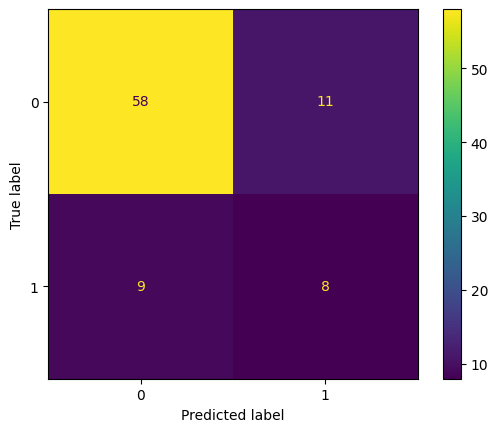

In [101]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Confusion Matrix
- 9 false negative
- 58 true positive
- 8 true negative
- 11 false positive

In [102]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_predict, y_aktual))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        69
           1       0.42      0.47      0.44        17

    accuracy                           0.77        86
   macro avg       0.64      0.66      0.65        86
weighted avg       0.78      0.77      0.77        86



- Precision dari semua class yang diprediksi positive berapa jumlah yang benar benar positive hasilnya 
- Recall dari semua class yang positive berapa yang betul betul positive
- f1-score nilai tengah rata rata dari precission dan recall 